In [4]:
# can use jupyter notebook
# or can use python -m notebook

# Link to schema: https://www.airroi.com/data-portal/markets/detroit-united-states

import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

df = pl.read_parquet("../data/airroi_listings.parquet")
print(df.shape)
df.head(3)

(270, 61)


listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
i64,str,str,str,str,i32,i64,str,str,str,bool,f64,f64,i32,i32,i32,f64,bool,str,bool,i32,str,str,i32,i32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64
10837,"""Famous DLY Gue…","""Entire home""","""entire_home""","""https://a0.mus…",41,39040,"""Nathan""","""""","""""",true,42.3786,-83.085,16,4,12,2.0,false,"""TV,Wifi,Air co…",false,1,"""Strict""","""USD""",100,0,499,4.78,4.7,4.9,4.7,5.0,4.3,4.7,40457.0,40457.0,222.2,222.2,0.5,0.0,110.8,110.8,0.0,0.0,174,0,191,365,16045.0,16045.0,263.5,263.5,0.7,0.0,178.3,178.3,0.0,0.0,60,0,30,90
259518,"""Design-centric…","""Entire rental …","""entire_home""","""https://a0.mus…",12,196727,"""Meghan""","""270516330""","""Lindsey""",true,42.3311,-83.0761,4,2,2,2.0,false,"""Wifi,Air condi…",false,1,"""Strict""","""USD""",100,0,475,4.89,4.9,5.0,4.9,4.9,4.9,4.7,37665.0,37665.0,185.5,185.5,0.5,0.0,103.2,103.2,0.0,0.0,194,0,171,365,13802.0,13802.0,243.5,243.5,0.6,0.0,153.4,153.4,0.0,0.0,53,0,37,90
491801,"""Old Farmhouse …","""Private room i…","""private_room""","""https://a0.mus…",24,2430640,"""Julie""","""""","""""",true,42.415,-82.9133,null,null,2,0.0,false,"""Children’s boo…",false,1,"""Flexible""","""USD""",20,10,143,4.86,4.8,4.9,4.7,4.9,4.6,4.8,2232.0,2232.0,52.1,52.1,0.1,0.1,6.1,6.1,7.8,7.8,41,77,324,365,585.0,585.0,58.1,58.1,0.1,0.1,6.5,6.5,9.0,9.0,9,25,81,90


In [2]:
df[['photos_count', 'guests', 'bedrooms', 'beds', 'baths', 'num_reviews', 'rating_overall', 'ttm_revenue', 'l90d_revenue']] .describe()

describe,photos_count,guests,bedrooms,beds,baths,num_reviews,rating_overall,ttm_revenue,l90d_revenue
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0
"""null_count""",0.0,61.0,74.0,0.0,0.0,0.0,2.0,0.0,0.0
"""mean""",23.42963,5.30622,2.204082,2.525926,1.168519,187.003704,4.775709,19567.777778,5711.281481
"""std""",14.165533,3.679727,1.380889,2.120285,0.953535,205.324107,0.197349,21727.966292,5947.997051
"""min""",2.0,1.0,1.0,1.0,0.0,1.0,3.69,336.0,0.0
"""max""",89.0,16.0,7.0,12.0,4.5,1182.0,5.0,177212.0,45298.0
"""median""",21.0,4.0,2.0,2.0,1.0,121.0,4.82,14748.0,4141.5
"""25%""",14.0,2.0,1.0,1.0,1.0,39.0,4.71,4437.0,1165.0
"""75%""",29.0,6.0,3.0,3.0,1.5,251.0,4.91,28641.0,8792.0


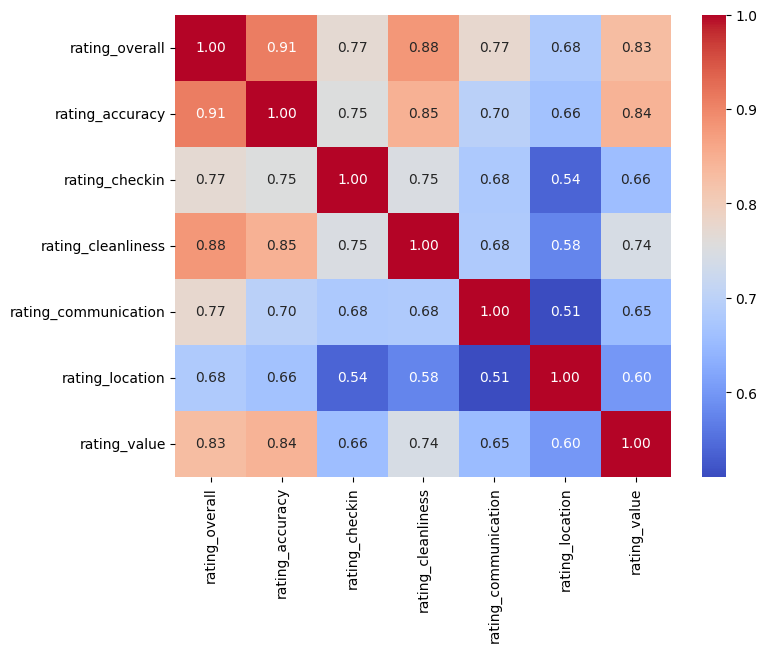

In [5]:
ratings_df = df.select(pl.col("^rating.*$"))
corr_matrix = ratings_df.to_pandas().corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()